<a href="https://colab.research.google.com/github/abdulmajid18/Face/blob/master/Face_Recog_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing libraries
import numpy as np
from keras.layers import Input,Dense,Flatten,Dropout
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# setting the directories of the data that will be used
# the train
# the test 
# the validation

train_path = '/content/drive/My Drive/New_ Project/4 images /Train'
test_path = '/content/drive/My Drive/New_ Project/4 images /Test'


In [3]:
#image size fot vgg16 is 224 * 224
image_size = [224,224]

In [4]:
# Adding preprocessing layer to the front of the VGG
vgg = VGG16(input_shape= image_size + [3],weights='imagenet',include_top = False)


58892288/58889256 [==============================] - 0s 0us/step


In [5]:
# not training the existing weights or parameter
for layer in vgg.layers:
  layer.trainable = False


In [6]:
# the suitable layer for our model
def create_model(vgg_output,vgg_input,drop,optimizer):
  x = Flatten()(vgg_output)
  #x = Dense(512,activation = 'relu)(x)
  #x = Dropout(drop)(x)
  prediction = Dense(3,activation='softmax')(x)
  model = Model(inputs= vgg_input,outputs=prediction)
  import tensorflow as tf
  #opt = tf.keras.optimizers.Adam(learning_rate=0.1)
  model.compile(loss='categorical_crossentropy',optimizer= optimizer,metrics= ['accuracy'])
  
  return model

In [7]:
# viewing the structure of the model
model = create_model(vgg.output,vgg.input,0,'adam') 
model.summary

<bound method Model.summary of <tensorflow.python.keras.engine.functional.Functional object at 0x7f7872509860>>

In [8]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [9]:
train_datagen = ImageDataGenerator(rescale= 1/255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1/255)

In [10]:
training_set = train_datagen.flow_from_directory(train_path,
                                                target_size=(224,244),
                                                batch_size = 32,
                                                class_mode = 'categorical')

Found 493 images belonging to 3 classes.


In [11]:
test_set = test_datagen.flow_from_directory(test_path,
                                          target_size=(224,224),
                                          batch_size= 32,
                                          class_mode = 'categorical')

Found 356 images belonging to 3 classes.


In [12]:
hist = model.fit(training_set,
                validation_data= test_set,
                epochs = 15,
                steps_per_epoch = 15,
                validation_steps = 11,verbose=1)

Epoch 1/15
15/15 [==============================] - 436s 29s/step - loss: 1.6654 - accuracy: 0.4534 - val_loss: 1.2664 - val_accuracy: 0.4801
Epoch 2/15
15/15 [==============================] - 408s 27s/step - loss: 0.6709 - accuracy: 0.7050 - val_loss: 0.6027 - val_accuracy: 0.7528
Epoch 3/15
15/15 [==============================] - 411s 27s/step - loss: 0.4022 - accuracy: 0.8503 - val_loss: 0.4080 - val_accuracy: 0.8636
Epoch 4/15
15/15 [==============================] - 411s 27s/step - loss: 0.3104 - accuracy: 0.8937 - val_loss: 0.3582 - val_accuracy: 0.8949
Epoch 5/15
15/15 [==============================] - 407s 27s/step - loss: 0.2347 - accuracy: 0.9436 - val_loss: 0.2927 - val_accuracy: 0.9176
Epoch 6/15
15/15 [==============================] - 411s 27s/step - loss: 0.2090 - accuracy: 0.9523 - val_loss: 0.2473 - val_accuracy: 0.9375
Epoch 7/15
15/15 [==============================] - 411s 27s/step - loss: 0.1940 - accuracy: 0.9523 - val_loss: 0.2709 - val_accuracy: 0.9233
Epoch 

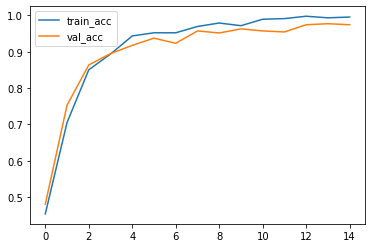

In [13]:
# Accuracy plotting the accuracy and validation accuracy
plt.plot(hist.history['accuracy'],label = 'train_acc')
plt.plot(hist.history['val_accuracy'],label = 'val_acc')
plt.legend()

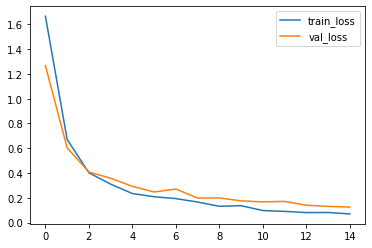

In [14]:
# Loss plotting the loss and the validation loss 
plt.plot(hist.history['loss'],label = 'train_loss')
plt.plot(hist.history['val_loss'],label = 'val_loss')
plt.legend()


In [15]:

model.save('faces_model_1')


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: faces_model_1/assets


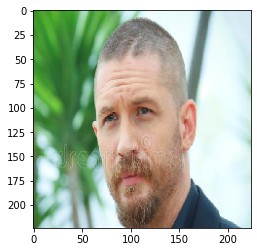

In [20]:
dir = '/content/drive/My Drive/tom-hardy-actor-attends-mad-max-fury-road-photocall-th-annual-cannes-film-festival-may-cannes-france-58038178.jpg'
from keras_preprocessing import image 
img = image.load_img(dir,
      target_size=(224,224))

img = np.asarray(img)
plt.imshow(img)

In [17]:

training_set.class_indices

{'pins_Chris Evans': 0, 'pins_Robert Downey Jr': 1, 'pins_Tom Hardy': 2}

In [21]:
img = np.expand_dims(img,axis=0)
from keras.models import load_model
saved_model = load_model('faces_model_1')
output = saved_model.predict(img)
print(output)
print(np.argmax(output))

[[1.3064173e-22 0.0000000e+00 1.0000000e+00]]
2


In [22]:
import cv2

In [23]:
# loading cascades
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [24]:
def face_extractor(img):
  # fuction detects the faces and returns the cropped face
  # if no face detected , it returns the input image 

  rgb_img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
  faces = face_cascade.detectMultiScale(img,1.3,5)
  for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    # the location of the parts of the face i
    cropped_face = rgb_img[y:y+h , x:x+w]
  return cropped_face
  cv2.waitKey(0)



In [25]:
dir = '/content/drive/My Drive/tom-hardy-actor-attends-mad-max-fury-road-photocall-th-annual-cannes-film-festival-may-cannes-france-58038178.jpg'
from keras_preprocessing import image 
img = cv2.imread(dir)


In [26]:
face_extractor(img)

array([[[ 41,  98,  47],
        [ 37,  94,  43],
        [ 32,  90,  40],
        ...,
        [166, 164, 152],
        [160, 160, 148],
        [157, 157, 147]],

       [[ 41,  98,  47],
        [ 36,  93,  42],
        [ 32,  90,  40],
        ...,
        [166, 164, 152],
        [162, 162, 150],
        [160, 160, 152]],

       [[ 40,  97,  46],
        [ 36,  93,  42],
        [ 32,  90,  40],
        ...,
        [166, 164, 152],
        [163, 163, 151],
        [167, 167, 159]],

       ...,

       [[142, 154, 144],
        [153, 168, 161],
        [163, 182, 178],
        ...,
        [ 54,  53,  61],
        [ 54,  58,  70],
        [ 46,  55,  70]],

       [[140, 152, 140],
        [151, 166, 159],
        [162, 181, 177],
        ...,
        [ 44,  50,  62],
        [ 48,  57,  72],
        [ 41,  54,  71]],

       [[138, 150, 138],
        [150, 166, 156],
        [161, 180, 176],
        ...,
        [ 42,  54,  70],
        [ 40,  56,  72],
        [ 38,  54,  70]]

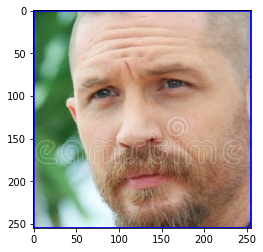

In [27]:
plt.imshow(face_extractor(img))

In [30]:
from google.colab.patches import cv2_imshow

[[2.0041775e-22 9.7015306e-02 9.0298474e-01]]


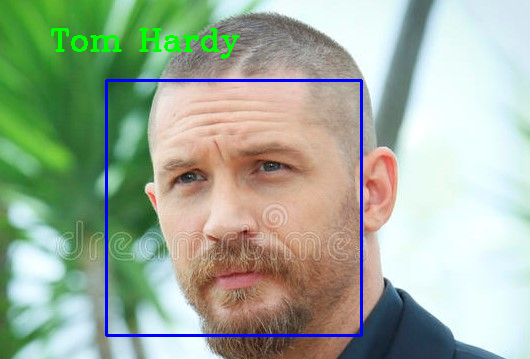

In [31]:
from PIL import Image
face = face_extractor(img)
if type(face) is np.ndarray:
  face = cv2.resize(face,(224,224))
  im = Image.fromarray(face,'RGB')
  img_array = np.asarray(im)
  img_array = np.expand_dims(img_array,axis=0)
  output = saved_model.predict(img_array)
  print(output)
  name = 'Unknown'
  if (output[0][2] > 0.5 ):
    name = 'Tom Hardy'
    cv2.putText(img,name,(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
else:
    cv2.putText(img,'Unknown',(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
cv2_imshow(img)


In [58]:
dir = '/content/drive/My Drive/New loaded images/test/pins_Tom Hardy/Tom Hardy181_1281.jpg'
from keras_preprocessing import image 
img = cv2.imread(dir)


[[9.5698826e-02 3.4535730e-26 9.0430117e-01]]


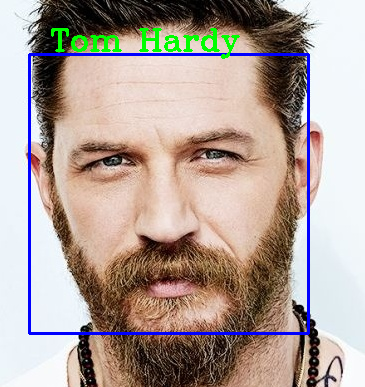

In [59]:

from PIL import Image
face = face_extractor(img)
if type(face) is np.ndarray:
  face = cv2.resize(face,(224,224))
  im = Image.fromarray(face,'RGB')
  img_array = np.asarray(im)
  img_array = np.expand_dims(img_array,axis=0)
  output = saved_model.predict(img_array)
  print(output)
  name = 'Unknown'
  if (output[0][2] > 0.5 ):
    name = 'Tom Hardy'
    cv2.putText(img,name,(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
else:
    cv2.putText(img,'Unknown',(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
cv2_imshow(img)

In [60]:
dir = '/content/drive/My Drive/New loaded images/test/pins_Chris Evans/gettyimages-1132843485-2048x2048.jpg'
from keras_preprocessing import image 
img = cv2.imread(dir)


[[1. 0. 0.]]


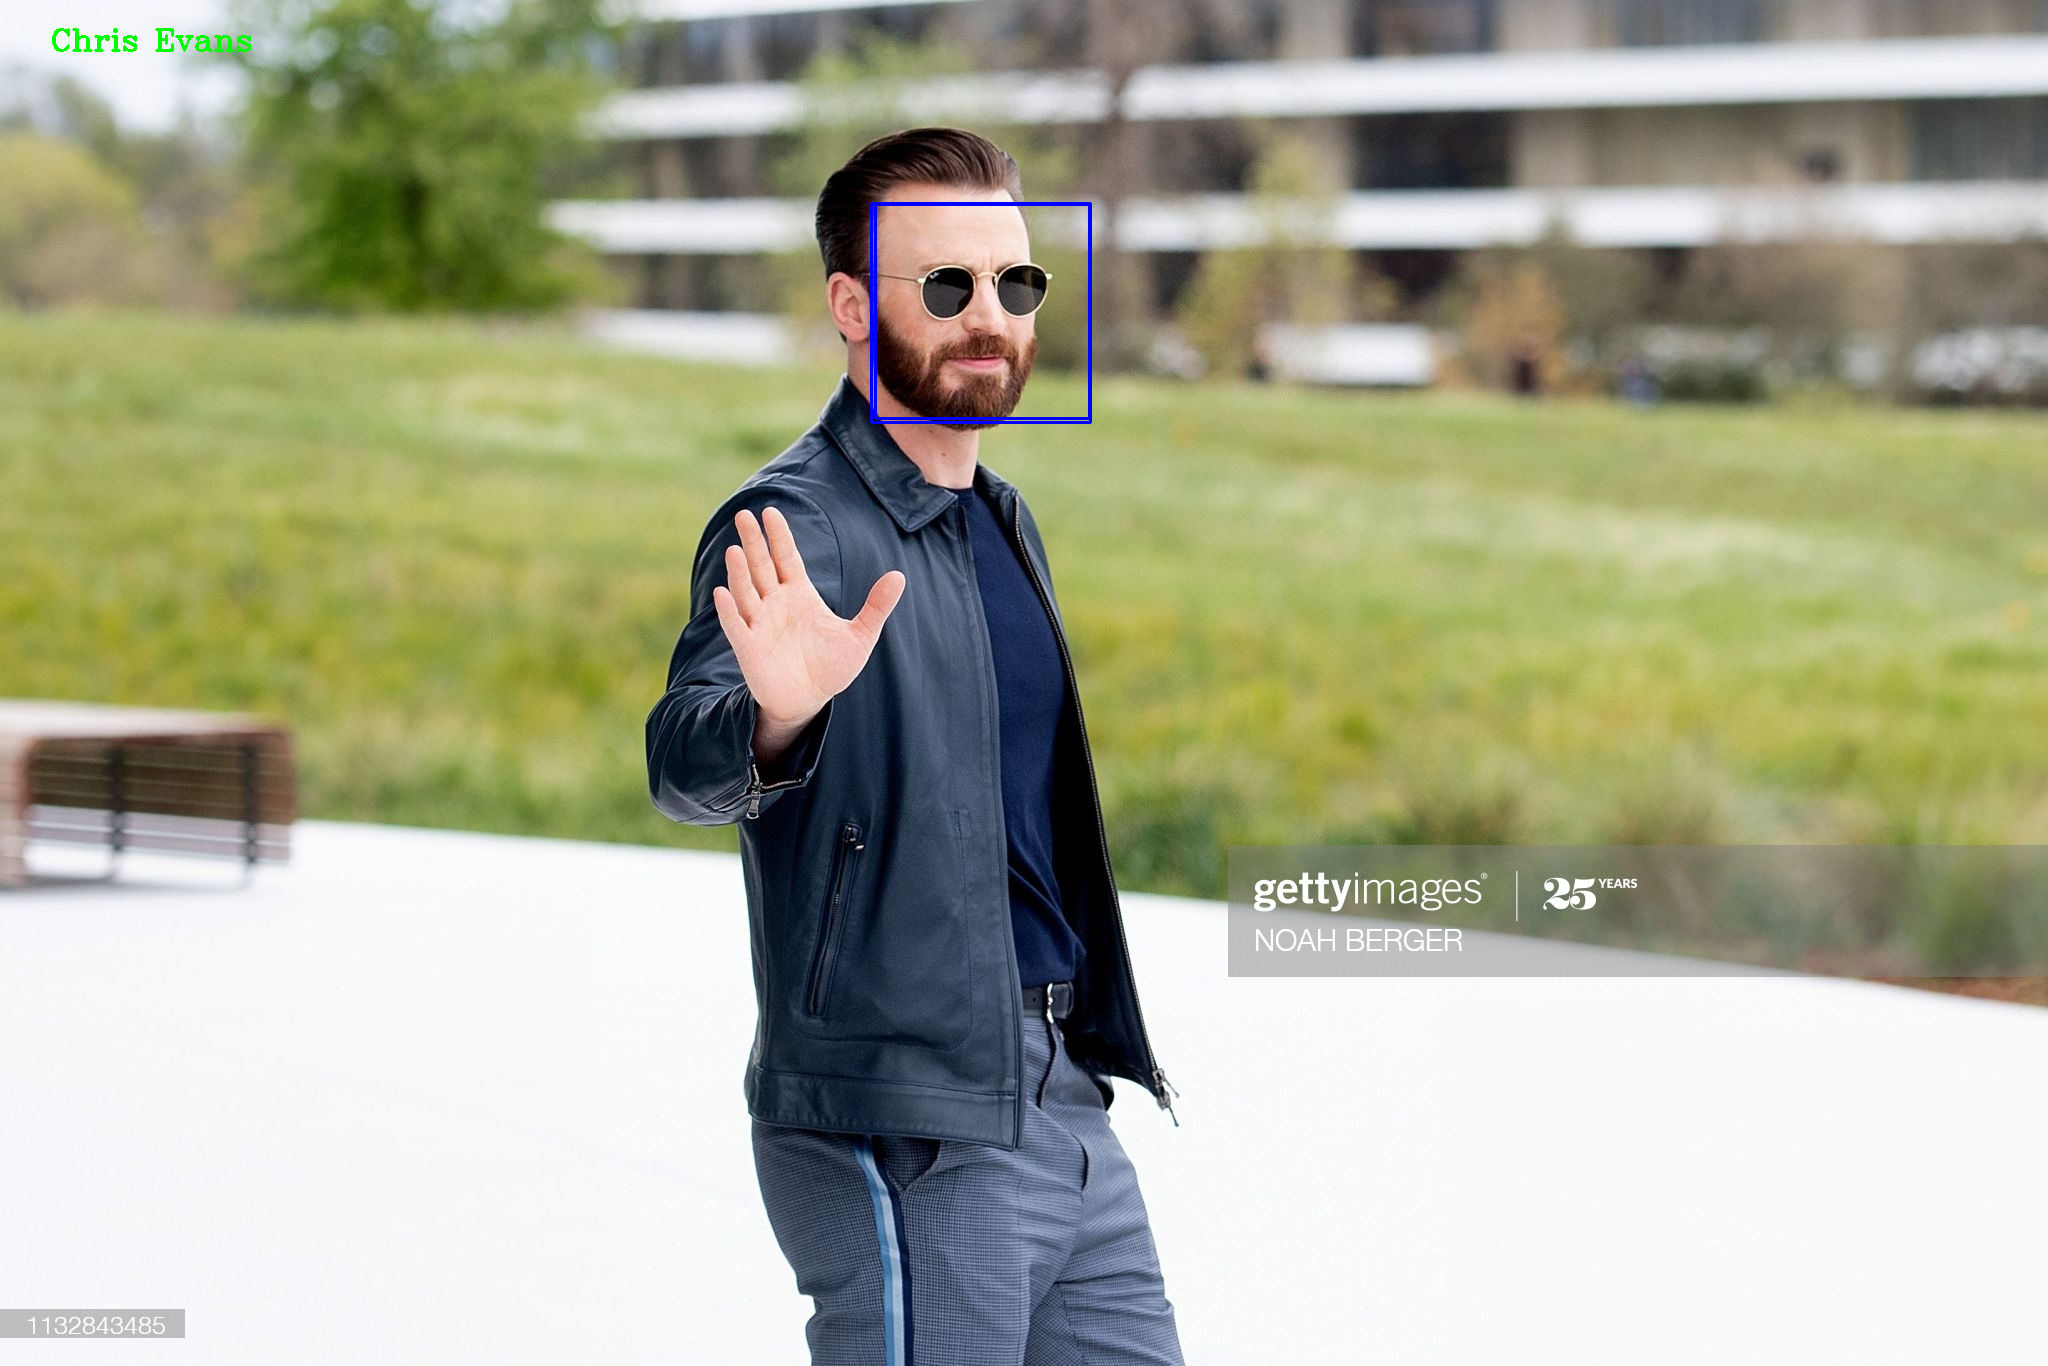

In [63]:

from PIL import Image
face = face_extractor(img)
if type(face) is np.ndarray:
  face = cv2.resize(face,(224,224))
  im = Image.fromarray(face,'RGB')
  img_array = np.asarray(im)
  img_array = np.expand_dims(img_array,axis=0)
  output = saved_model.predict(img_array)
  print(output)
  name = 'Unknown'
  if (output[0][2] > 0.5 ):
    name = 'Tom Hardy'
    cv2.putText(img,name,(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
  else:
    if (output[0][0] > 0.5):
      name = 'Chris Evans'
      cv2.putText(img,name,(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
cv2_imshow(img)